___
# Ciência dos Dados - PROJETO 1

## Anna Beathriz Cipriano de Mauro
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches

In [2]:
dados15 = pd.read_csv('DOM2015.csv',sep=',')
dados14 = pd.read_csv('DOM2014.csv',sep=',')
dados13 = pd.read_csv('DOM2013.csv',sep=',')
dados1 = dados15.append(dados14)
dados = dados1.append(dados13)

In [3]:
#Limitações
dados = dados[dados.V4105 <= 3]

In [4]:
#Ano
dados=dados.rename(columns = {'V0101':'Ano'})
dados=dados.rename(columns = {'V4621':'Renda'})
dados.loc[dados.Renda == 999999999999.0 , 'Renda'] = np.NaN

#Acesso Internet
dados=dados.rename(columns = {'V02322':'Internet'})
dados.loc[dados.Internet == 2, 'Internet'] = 'Sim'
dados.loc[dados.Internet == 4, 'Internet'] = 'Não'

In [5]:
#Região
dados.loc[dados.UF<20,'REGIAO'] = 'Norte'
dados.loc[dados.UF>=20,'REGIAO'] = 'Nordeste'
dados.loc[dados.UF>=30,'REGIAO'] = 'Sudeste'
dados.loc[dados.UF>=40,'REGIAO'] = 'Sul'
dados.loc[dados.UF>=50,'REGIAO'] = 'Centro-Oeste'

In [6]:
#-------------------- Internet -------------------------------

#Acesso
dados.loc[dados.V02323 == 2, 'Microcomputador'] = 'Sim'
dados.loc[dados.V02323 == 4, 'Microcomputador'] = 'Não'

dados.loc[dados.V02324 == 2, 'Celular'] = 'Sim'
dados.loc[dados.V02324 == 4, 'Celular'] = 'Não'



In [7]:
#Renda per capita quali
dados.loc[dados.V4622 == 99,'Renda domiciliar per capita'] = np.NaN
dados.loc[dados.V4622 == 0, 'Renda domiciliar per capita'] = 'Sem rendimento'
dados.loc[dados.V4622 == 1, 'Renda domiciliar per capita'] = 'Até 1/4 do salário mínimo'
dados.loc[dados.V4622 == 2, 'Renda domiciliar per capita'] = '1/4 a 1/2 salário mínimo'
dados.loc[dados.V4622 == 3, 'Renda domiciliar per capita'] = '1/2 a 1 salário mínimo'
dados.loc[dados.V4622 == 4, 'Renda domiciliar per capita'] = '1 a 2 salários mínimos'
dados.loc[dados.V4622 == 5, 'Renda domiciliar per capita'] = '2 a 3 salários mínimos'
dados.loc[dados.V4622 == 6, 'Renda domiciliar per capita'] = '3 a 5 salários mínimos'
dados.loc[dados.V4622 == 7, 'Renda domiciliar per capita'] = 'Mais de 5 salários mínimos'


In [8]:
dados.Renda

0           800.0
1             NaN
2          1150.0
3           793.0
4          2900.0
5          1990.0
6           350.0
7          1333.0
8           818.0
9             NaN
10         1716.0
11         2500.0
12            NaN
13         1400.0
14            NaN
15          666.0
16          788.0
17          750.0
18         1437.0
19          600.0
20          933.0
21         1087.0
22            NaN
23         2666.0
24            NaN
25            NaN
26          700.0
27         3325.0
28         3500.0
29         1172.0
           ...   
148667        NaN
148668     4000.0
148669    23500.0
148670        NaN
148671        NaN
148672     6250.0
148673        NaN
148674        NaN
148675        NaN
148676        NaN
148677    13000.0
148678     7000.0
148679     9200.0
148680      538.0
148681      150.0
148682     1300.0
148683      750.0
148684      600.0
148685        NaN
148686        NaN
148687      356.0
148688      974.0
148689      750.0
148690      516.0
148691    

In [9]:
inicio = dados.columns.get_loc('REGIAO')
fim = dados.columns.get_loc('Renda domiciliar per capita')
ano = dados.columns.get_loc('Ano')
internet = dados.columns.get_loc('Internet')
renda = dados.columns.get_loc('Renda')
Colunas =[internet,ano,renda]
for x in range(inicio,fim+1):
    Colunas.append(x)
dados = dados.iloc[:,Colunas]
dados = dados.dropna(subset=('REGIAO','Renda domiciliar per capita','Renda'))

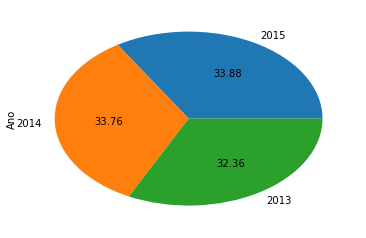

In [10]:
evc = dados.Ano.value_counts()
evc.plot(kind='pie', autopct="%.2f", legend=False)

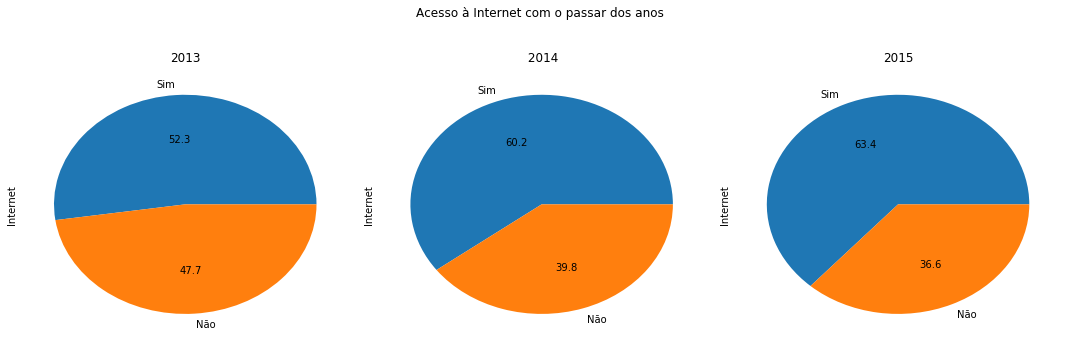

In [11]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
inter13 = dados.Internet[dados.Ano==2013].value_counts(True)*100
plot = inter13.plot(kind='pie',autopct="%0.1f",legend=False, title = '2013')

plt.subplot(132)
plt.title( 'Acesso à Internet com o passar dos anos \n\n\n 2014')
inter14 = dados.Internet[dados.Ano==2014].value_counts(True)*100
plot = inter14.plot(kind='pie',autopct="%0.1f",legend=False)

plt.subplot(133)
inter15 = dados.Internet[dados.Ano==2015].value_counts(True)*100
plot = inter15.plot(kind='pie',autopct="%0.1f",legend=False,title = '2015')

plt.tight_layout()
plt.show()

In [ ]:
#--------------Renda -----------------
faixasrend = np.arange(0,10000,500)
dados.Renda[dados.Ano == 2013].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')
plt.show()

In [ ]:
dados = dados[dados.Internet == 'Sim']

In [ ]:
#--------------Renda -----------------
faixasrend = np.arange(0,10000,500)
dados.Renda[dados.Ano == 2013].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')
plt.show()

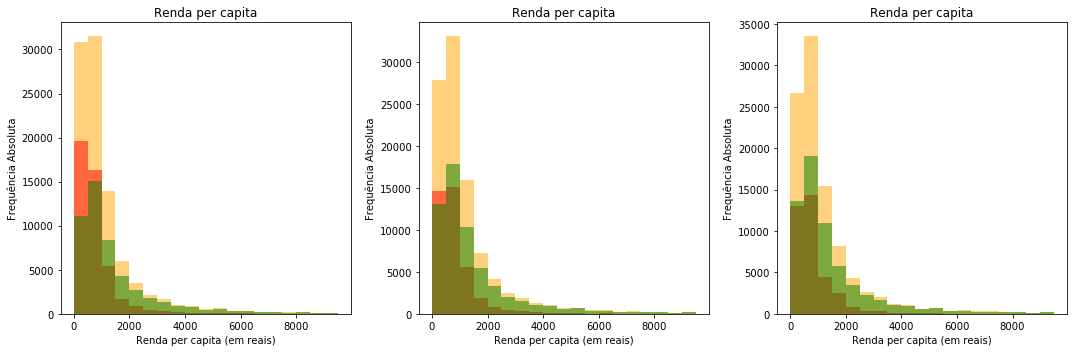

In [17]:
#--------------Renda -----------------

fig = plt.figure(figsize=(20, 5))
plt.subplot(141)

dadosx = dados

dadosx=dadosx.rename(columns = {'Renda':'Brasil'})

faixasrend = np.arange(0,10000,500)
dadosx.Brasil[dadosx.Ano == 2013].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('orange'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')

dadosIn = dados[dados.Internet == 'Não']

dadosIn=dadosIn.rename(columns = {'Renda':'Pessoas sem acesso à Internet'})

dadosIn['Pessoas sem acesso à Internet'][dadosIn.Ano == 2013].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('red'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')

dadosI = dados[dados.Internet == 'Sim']

dadosI=dadosI.rename(columns = {'Renda':'Pessoas com acesso à Internet'})

#--------------Renda -----------------
dadosI['Pessoas com acesso à Internet'][dadosI.Ano == 2013].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('green'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')


#--------------------------------------------
plt.subplot(142)
dadosx.Brasil[dadosx.Ano == 2014].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('orange'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')

dadosIn['Pessoas sem acesso à Internet'][dadosIn.Ano == 2014].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('red'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')


dadosI['Pessoas com acesso à Internet'][dadosI.Ano == 2014].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('green'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')

#--------------------------------------------
plt.subplot(143)
dadosx.Brasil[dadosx.Ano == 2015].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('orange'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')

dadosIn['Pessoas sem acesso à Internet'][dadosIn.Ano == 2015].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('red'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')


dadosI['Pessoas com acesso à Internet'][dadosI.Ano == 2015].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5, color = ('green'))
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')


#ax = plt.subplot(144)

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()



In [ ]:
#--------------Renda -----------------
faixasrend = np.arange(minimo,maximo,deltafaixas)

In [ ]:
#Função para o gráfico stacked
def porc_linha_ou_coluna(tabela):
    a= (tabela/float(tabela[-1])*100).round(decimals=1)
    return a

In [ ]:
regcel = pd.crosstab(dados.REGIAO[dados.Ano==2015],dados.Celular[dados.Ano==2015],margins = True, normalize=True,).apply(porc_linha_ou_coluna,axis=1)
regcel = regcel.iloc[0:5,0:3]
regcel

In [ ]:
dc15 = dados.Celular[dados.Ano==2015].value_counts(True)*100
dc14 = dados.Celular[dados.Ano==2014].value_counts(True)*100
dc13 = dados.Celular[dados.Ano==2013].value_counts(True)*100

fig= plt.figure(figsize = (20,5))
plt.subplot(131)
plot = dc15.plot(kind='pie',autopct="%0.2f",legend=False)

plt.subplot(132)
plot = dc14.plot(kind='pie',autopct="%0.2f",legend=False)

plt.subplot(133)
plot = dc13.plot(kind='pie',autopct="%0.2f",legend=False)

plt.show()

In [ ]:
dados.Renda

In [ ]:
#--------------Renda -----------------
faixasrend = np.arange(0,10000,500)
dados.Renda[dados.Ano == 2013].plot.hist(bins=faixasrend, title = 'Renda per capita', alpha = 0.5)
plt.xlabel('Renda per capita (em reais)')
plt.ylabel('Frequência Absoluta')
plt.show()


## Conclusão 

Descreva aqui suas conclusões!